In [1]:
%matplotlib inline
import sys
sys.path.append('../../')
from modules.tools import open_file, dataframe, ohlc_chart

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

In [9]:
pdens = open_file('h5py', 'etc/historical_PD.h5', mode='r')
ohlc = open_file('h5py', 'raw data/daily_futures.h5', mode='r')

In [10]:
ad_pd = pdens['AD']
ad_ohlc = dataframe('CME_AD', ohlc)

In [11]:
tdop = ad_pd['tdop'].value
price = ad_pd['prices'].value
dates = ad_pd['dates'].value.astype('M8[D]')

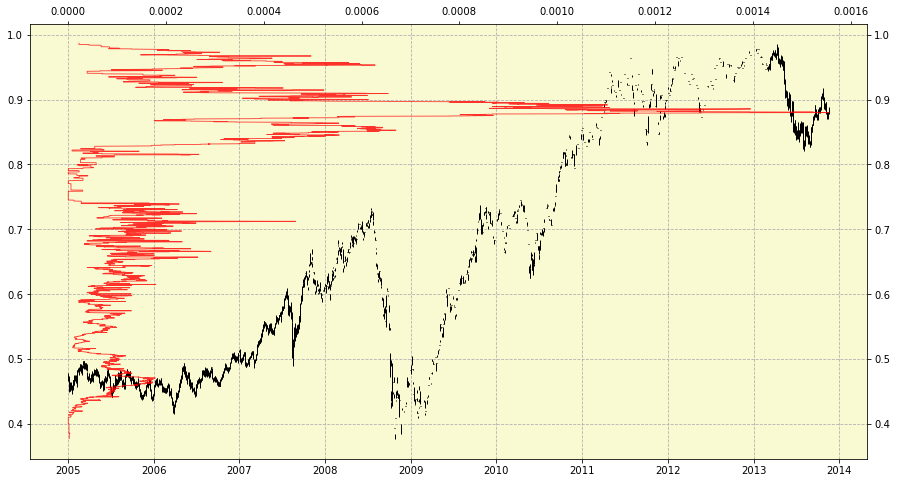

In [58]:
date = np.datetime64('2013-11-19')
idx = np.where(dates==date)[0][0]
density = tdop[idx]

fig=plt.figure(figsize=(15,8))
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax = ohlc_chart(ax, ad_ohlc.loc[:date])

ax2.plot(density, price, color="red", alpha=0.8, linewidth=0.8)
ax2.set_ylim(ax.get_ylim())
#ax2.invert_xaxis()
ax2.xaxis.tick_top()

plt.show()

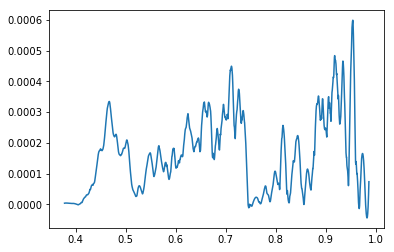

In [194]:
plt.plot(price, savgol_filter(density, 151, 3) )

(4000, 5500)

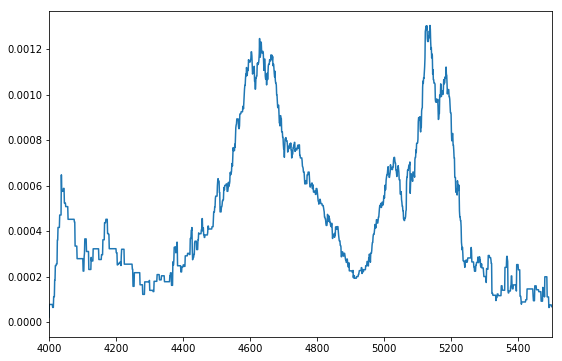

In [120]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(tdop[-1])
ax.set_xlim([4000,5500])

In [107]:
max_tdop = []
for k in tdop:
    smoothed = savgol_filter(k, 21, 5)
    arg = smoothed.argmax()
    max_tdop.append(price[arg])

In [108]:
max_tdop = np.array(max_tdop)

In [61]:
max_tdop = tdop.argmax(axis=1)

In [109]:
max_tdop.shape

(3649,)

In [45]:
date.shape

(3649,)

In [80]:
tdoparr = price[max_tdop]

In [81]:
arr = pd.Series(tdoparr).rolling(10).mean()

In [103]:
arr = savgol_filter(tdoparr, 31, 5)

In [52]:
tdop.shape

(3649, 6090)

(1000, 1500)

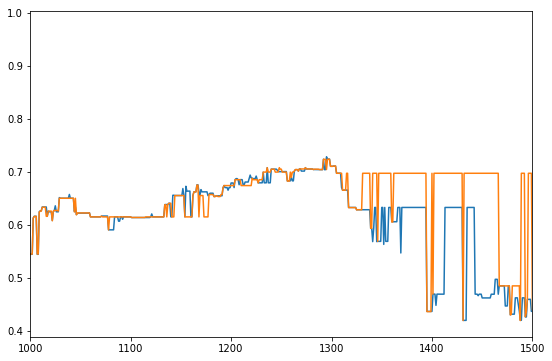

In [111]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(max_tdop)
ax.plot(tdoparr)
ax.set_xlim([1000,1500])

(0.4, 0.52)

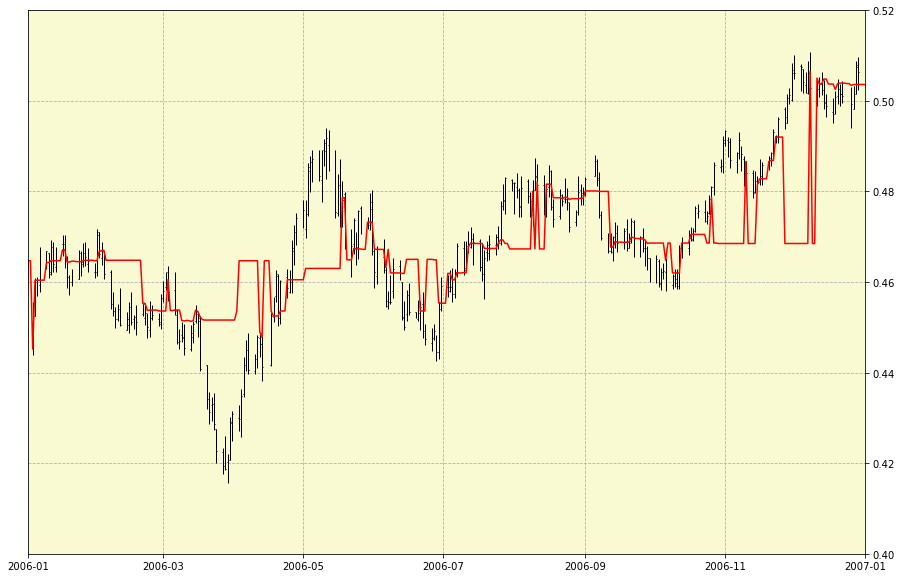

In [113]:
fig, ax = plt.subplots(figsize=(15,10))
ax = ohlc_chart(ax, ad_ohlc)
#ax.plot(ad_ohlc.index, ad_ohlc['close'])
ax.plot(date, max_tdop, color='red')
ax.set_xlim([np.datetime64('2006-01-01'), np.datetime64('2007-01-01')])
ax.set_ylim([0.4, 0.52])

In [68]:
np.datetime64('2001-01-01')

numpy.datetime64('2001-01-01')

In [33]:
ad_ohlc.loc[date]

open           0.6179
high           0.6188
low            0.6116
close          0.6116
volume     42480.0000
op_int    101524.0000
Name: 2007-10-03 00:00:00, dtype: float64

In [30]:
ad_ohlc.loc['2007-09-25':]

,open,high,low,close,volume,op_int
date,,,,,,
2007-09-25,0.5970,0.6030,0.5901,0.6024,46786.0,68035.0
2007-09-26,0.6023,0.6058,0.6002,0.6056,32901.0,73533.0
2007-09-27,0.6057,0.6127,0.6040,0.6094,29688.0,75084.0
2007-09-28,0.6115,0.6179,0.6115,0.6177,38488.0,85203.0
2007-10-01,0.6176,0.6241,0.6175,0.6240,39013.0,92873.0
2007-10-02,0.6158,0.6158,0.6116,0.6152,39183.0,97068.0
2007-10-03,0.6179,0.6188,0.6116,0.6116,42480.0,101524.0
2007-10-04,0.6153,0.6186,0.6149,0.6165,41159.0,101939.0
2007-10-05,0.6211,0.6265,0.6190,0.6265,56449.0,98780.0
